# 5G Attack Detection - Data Discovery
 César de Paula Morais - PORVIR Winet

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Funções Auxiliares

In [3]:
class Aux:
    @classmethod
    def plot_histogram(cls, data: list, color_scheme=None):
        plt.scatter(range(len(data)), data, c=color_scheme)
        plt.ylim(-1, 1)
        plt.axhline(0, color='black', linestyle='--')

        plt.show()

In [4]:
df = pd.read_csv("5G_attack_detection_ds.csv")
df = df.dropna()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,49,55,48,51,48,51,48,53,51,102,...,54,56,50,98,101,101,102,48,56,1
1,102,101,51,56,50,102,98,100,57,52,...,99,54,101,54,99,100,99,102,52,1
2,51,52,102,102,48,48,52,100,48,48,...,48,48,48,48,48,48,48,48,48,1
3,52,50,97,51,48,49,50,101,56,54,...,48,48,48,48,48,48,48,48,48,1
4,51,52,102,102,48,53,56,48,48,48,...,53,97,48,53,55,49,101,49,55,1


In [5]:
df.iloc[:, 1024].value_counts()

 1    24174
-1    24174
Name: 1024, dtype: int64

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
count,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,...,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.000000,48348.00000
mean,57.432365,68.335443,63.137958,64.065008,52.096364,54.951063,54.635869,56.703276,60.889303,67.438922,...,53.245987,53.251965,53.278915,53.235894,53.704145,53.322930,55.116716,53.189687,55.314594,0.00000
std,15.523045,22.184792,23.031216,22.575152,11.884525,15.395220,14.374543,17.899496,19.965914,23.359033,...,14.434037,14.206878,14.373414,14.279368,14.889891,14.179228,16.706066,14.302034,17.111443,1.00001
min,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,-1.00000
25%,51.000000,52.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,-1.00000
50%,52.000000,55.000000,49.000000,51.000000,48.000000,49.000000,50.000000,48.000000,51.000000,54.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,0.00000
75%,54.000000,98.000000,98.000000,98.000000,52.000000,52.000000,53.000000,53.000000,56.000000,98.000000,...,49.000000,50.000000,49.000000,50.000000,50.000000,50.000000,51.000000,50.000000,50.000000,1.00000
max,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,1.00000


## Data Discovery

### Usando Correlação de Pearson

A correlação de Pearson avalia a relação linear entre duas variáveis **contínuas**. Como nossa coluna de ataques é binária (+1 e -1), esse não é o método mais recomendado, mas vamos observar os resiultados mesmo assim.

In [7]:
pearson_correlation = df.iloc[:, :-1].corrwith(df['1024'], method='pearson')

pearson_highest_correlation = pearson_correlation[(pearson_correlation > 0.5) | (pearson_correlation < -0.5)]
print(pearson_highest_correlation)

2     0.607133
3     0.617595
24   -0.503442
25   -0.585835
65    0.538109
74    0.577682
dtype: float64


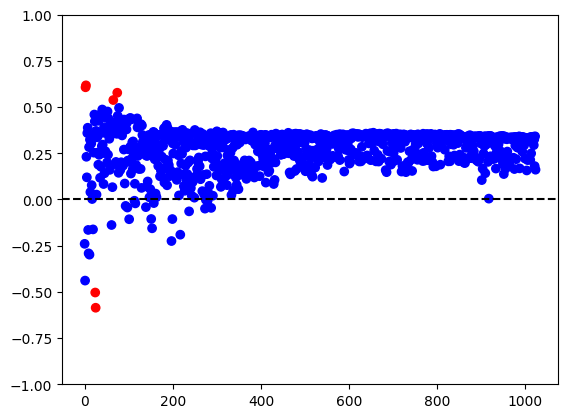

In [8]:
# Color higher variables
pearson_color_scheme = np.where(abs(pearson_correlation) > 0.5, 'r', 'b')

Aux.plot_histogram(pearson_correlation, pearson_color_scheme)

### Usando [Coeficiente de correlação ponto-bisserial](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_ponto-bisserial)

É semelhante à Pearson, mas para uma variável binária

In [9]:
# Calculate point-biserial correlation coefficient for each integer variable
pbc_correlations = []
for column in df.columns[:-1]:  # Exclude the last column (binary variable)
    correlation, p_value = stats.pointbiserialr(df[column], df['1024'])
    pbc_correlations.append(correlation)

pbc_correlations = np.array(pbc_correlations)

pbc_highest_correlation = pbc_correlations[(pbc_correlations > 0.5) | (pbc_correlations < -0.5)]
print(pbc_highest_correlation)

[ 0.60713332  0.61759462 -0.50344192 -0.58583542  0.53810944  0.57768162]


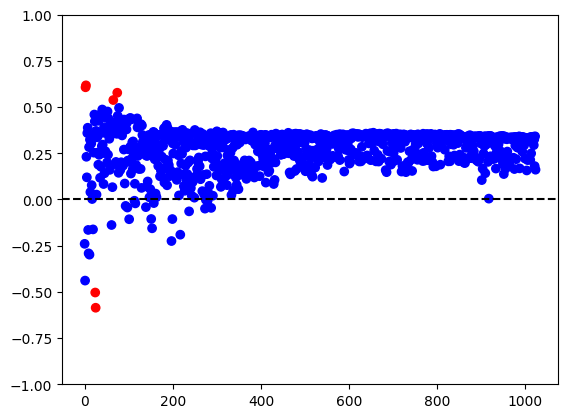

In [10]:
# Color higher variables
pbc_color_scheme = np.where(abs(pbc_correlations) > 0.5, 'r', 'b')

Aux.plot_histogram(pbc_correlations, pbc_color_scheme)

Ambos os métodos deram resultados iguais - pode ser que a implementação de Pearson já aplique o tratamento correto caso uma das variáveis seja binária

### PCA


In [11]:
# 1. Separar as features (variáveis independentes)
X = df.iloc[:, :-1]

# 2. Padronizar as features para ter média 0 e desvio padrão 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Inicializar e ajustar o modelo PCA
pca = PCA()
pca.fit(X_scaled)

# 4. Transformar os dados nas componentes principais
X_pca = pca.transform(X_scaled)

# 5. Verificar a variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Variância explicada por cada componente principal:", explained_variance_ratio)


Variância explicada por cada componente principal: [2.81646620e-01 2.55025140e-02 1.70822982e-02 ... 2.17974120e-04
 1.95740541e-04 1.43592822e-04]


O scree plot é uma forma de verificar qual o melhor número de componentes selecionar para explicar nossos dados. Cada ponto no eixo y corresponde à porcentagem da variabilidade total do conjunto de dados explicada por um determinado componente principal.

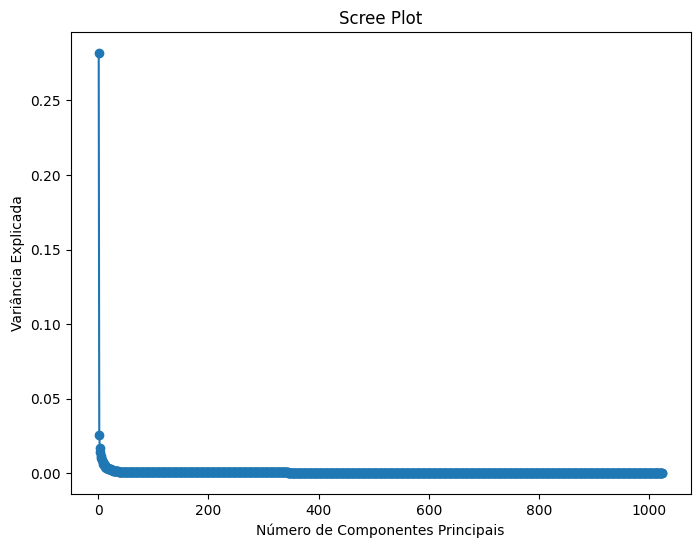

In [12]:
# Plotar Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Scree Plot')
plt.show()

Como o gráfico descende muito rapidamente, vamos verificar apenas os 10 primeiros componentes principais

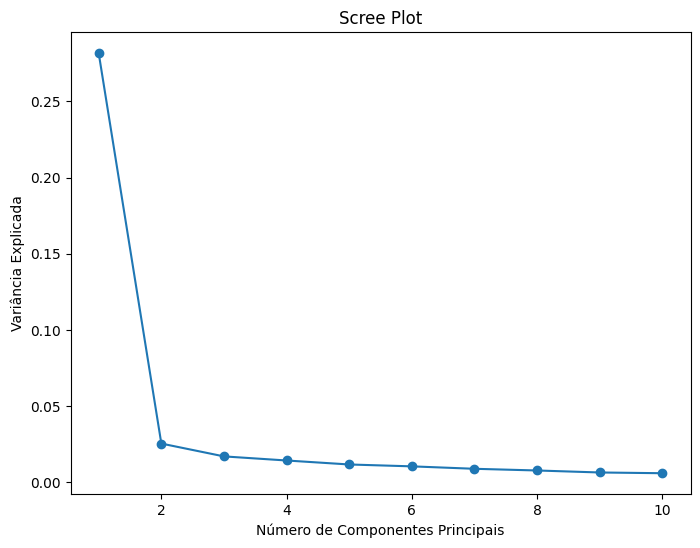

In [13]:
first_10 = explained_variance_ratio[:10]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(first_10) + 1), first_10, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Scree Plot')
plt.show()

Vamos selecionar, então, apenas os 2 primeiros componentes principais.

In [14]:
num_components = 2
X_pca_selected = X_pca[:, :num_components]

Vamos agora plotar nossos dados usando apenas os 2 componentes principais, e verificar sua relação com os ataques (pontos vermelhos são ataques)

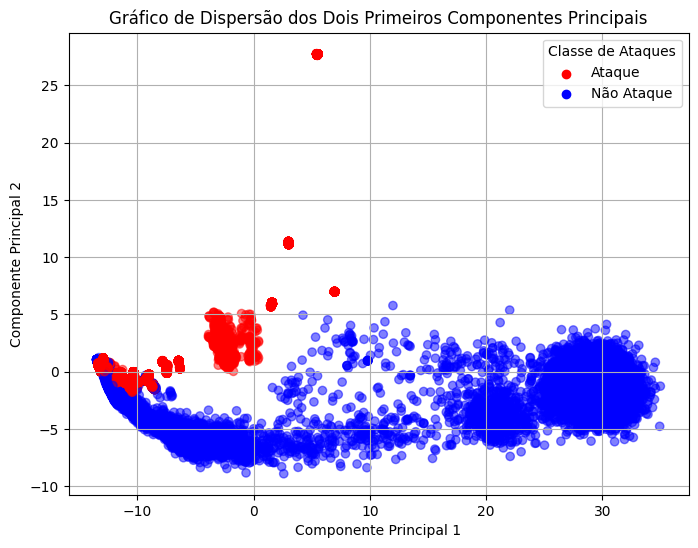

In [19]:
componente1 = X_pca_selected[:, 0]
componente2 = X_pca_selected[:, 1]

attack_classes = df['1024']

# Mapear os valores de ataque para cores específicas
colors = {-1: 'red', 1: 'blue'}
labels = {-1: 'Ataque', 1: 'Não Ataque'}

plt.figure(figsize=(8, 6))
plt.scatter(componente1, componente2, c=attack_classes.map(colors), alpha=0.5)
plt.title('Gráfico de Dispersão dos Dois Primeiros Componentes Principais')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)

# Adicionar legenda manualmente
for attack_class, color in colors.items():
    plt.scatter([], [], c=color, label=labels[attack_class])
plt.legend(title='Classe de Ataques')

plt.show()